Write Python code to implement the following. Consider dataset files as “income.csv”

1. Build a AdaBoost classifier to classify Income dataset

Accuracy with 10 trees: 0.8182
Confusion Matrix:
 [[6782  632]
 [1144 1211]]


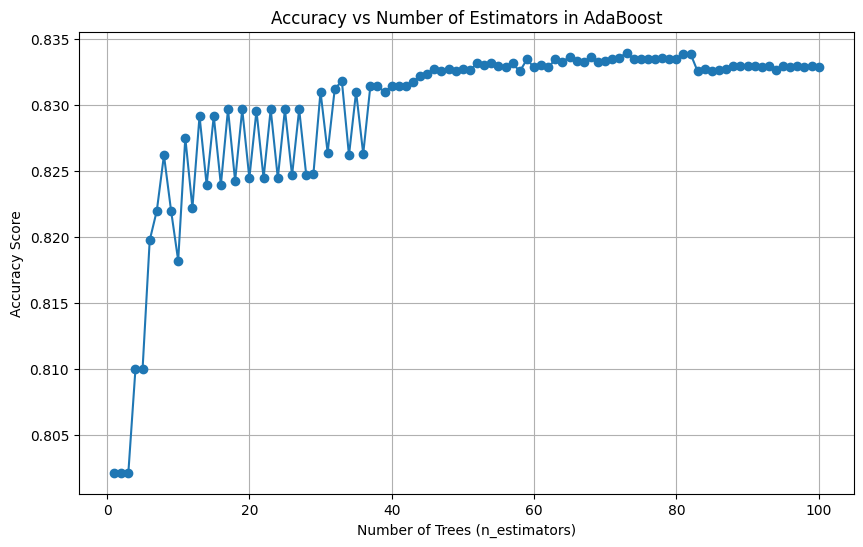

Best accuracy: 0.8340 with 73 trees


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
df = pd.read_csv("/income.csv")
df.columns = df.columns.str.strip()  # Clean column names

# Features and target
X = df.drop("income_level", axis=1)
y = df["income_level"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




Measure prediction score using n_estimators (10).

In [ ]:
# AdaBoost model with 10 estimators
model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=10,
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy with 10 trees: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)

# Tune number of estimators from 1 to 100
scores = []
for n in range(1, 101):
    model = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=n,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))



Now fine tune your model by changing number of trees in your classifier and identify what best score you can get using how
many trees

In [ ]:
# Plot accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), scores, marker='o')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy Score")
plt.title("Accuracy vs Number of Estimators in AdaBoost")
plt.grid(True)
plt.show()

# Best score
best_score = max(scores)
best_n = scores.index(best_score) + 1
print(f"Best accuracy: {best_score:.4f} with {best_n} trees")
